In [3]:
# Formação Cientista de Dados
# Previsão de Séries Temporais (ARIMA)

In [1]:
!pip install numpy==1.24.4 pmdarima --no-cache-dir --force-reinstall

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.0/698.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 4.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.6.2
    Uninstalling url

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
## pip install pmdarima
from pmdarima.arima import auto_arima

In [5]:
#conversão dos atributos que estão no formato string para o formato ano-mês
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [6]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


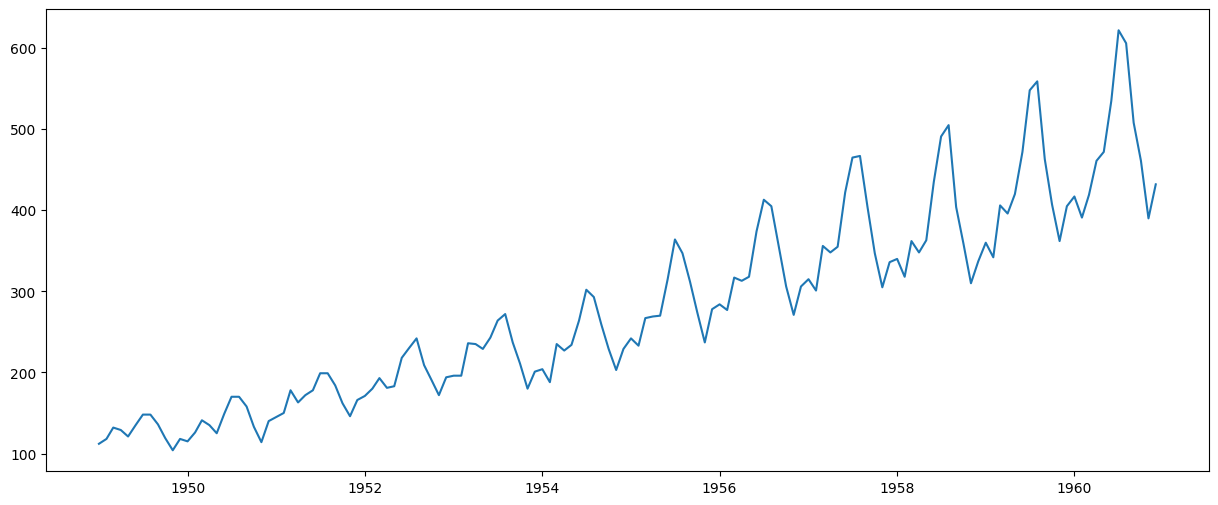

In [7]:
plt.plot(data)

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Supondo que data seja uma série temporal (pd.Series) com índice datetime
model = SARIMAX(data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=12)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()
data.index = pd.DatetimeIndex(data.index, freq='MS')
model_fit = model.fit()


/home/marcos/DataScience/ds_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/marcos/DataScience/ds_env/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52844D+00    |proj g|=  8.65844D-02

At iterate    5    f=  3.52337D+00    |proj g|=  3.73531D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96159D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.98067D-03

At iterate   20    f=  3.51493D+00    |proj g|=  6.50283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   5.556D-06   3.515D+00
  F =   3.5149263538229030     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  3.52337D+00    |proj g|=  3.73531D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96159D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.98067D-03

At iterate   20    f=  3.51493D+00    |proj g|=  6.50283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   5.556D-06   3.515D+00
  F =   3.5149263538229030     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [18]:
# AIC do modelo
print(model_fit.aic)

1022.2987899009961


In [19]:
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [20]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [21]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [22]:
forecast = model_fit.forecast(steps=12)  # número de períodos futuros
print(forecast)


1961-01-01    449.331907
1961-02-01    424.389194
1961-03-01    459.039856
1961-04-01    497.869156
1961-05-01    509.867965
1961-06-01    568.261574
1961-07-01    655.813899
1961-08-01    641.195473
1961-09-01    546.399088
1961-10-01    496.805807
1961-11-01    427.681090
1961-12-01    471.243949
Freq: MS, Name: predicted_mean, dtype: float64


In [23]:
# Previsão para 12 períodos
forecast = model_fit.get_forecast(steps=12)
future_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

print(future_forecast)


1961-01-01    449.331907
1961-02-01    424.389194
1961-03-01    459.039856
1961-04-01    497.869156
1961-05-01    509.867965
1961-06-01    568.261574
1961-07-01    655.813899
1961-08-01    641.195473
1961-09-01    546.399088
1961-10-01    496.805807
1961-11-01    427.681090
1961-12-01    471.243949
Freq: MS, Name: predicted_mean, dtype: float64


In [24]:
future_forecast

1961-01-01    449.331907
1961-02-01    424.389194
1961-03-01    459.039856
1961-04-01    497.869156
1961-05-01    509.867965
1961-06-01    568.261574
1961-07-01    655.813899
1961-08-01    641.195473
1961-09-01    546.399088
1961-10-01    496.805807
1961-11-01    427.681090
1961-12-01    471.243949
Freq: MS, Name: predicted_mean, dtype: float64

In [25]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<Axes: xlabel='Month'>

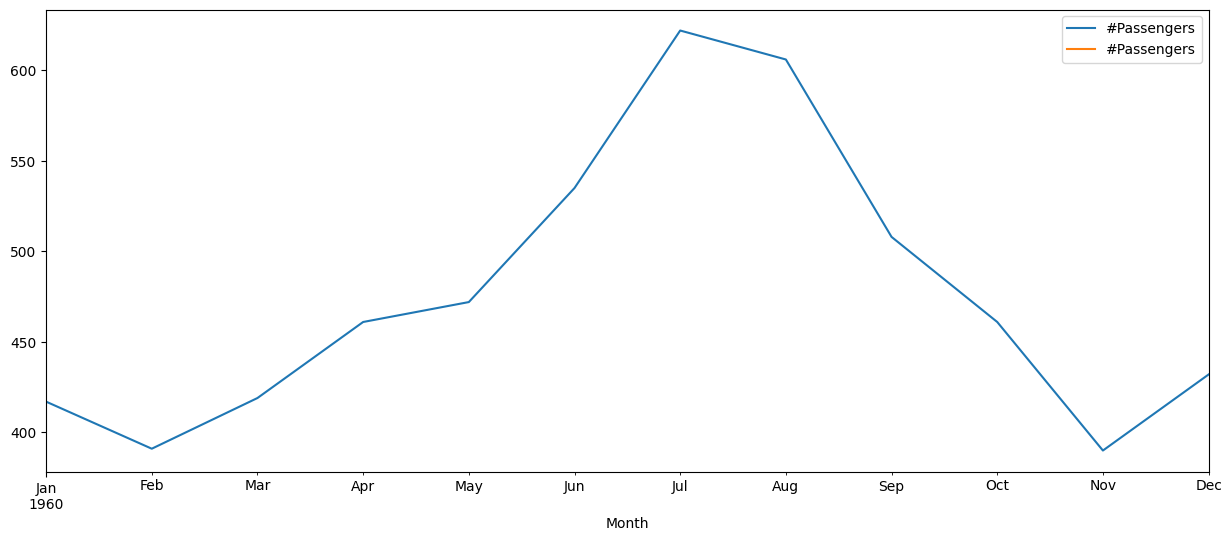

In [26]:
#azul test laranja forecast
pd.concat([test,future_forecast],axis=1).plot()

<Axes: xlabel='Month'>

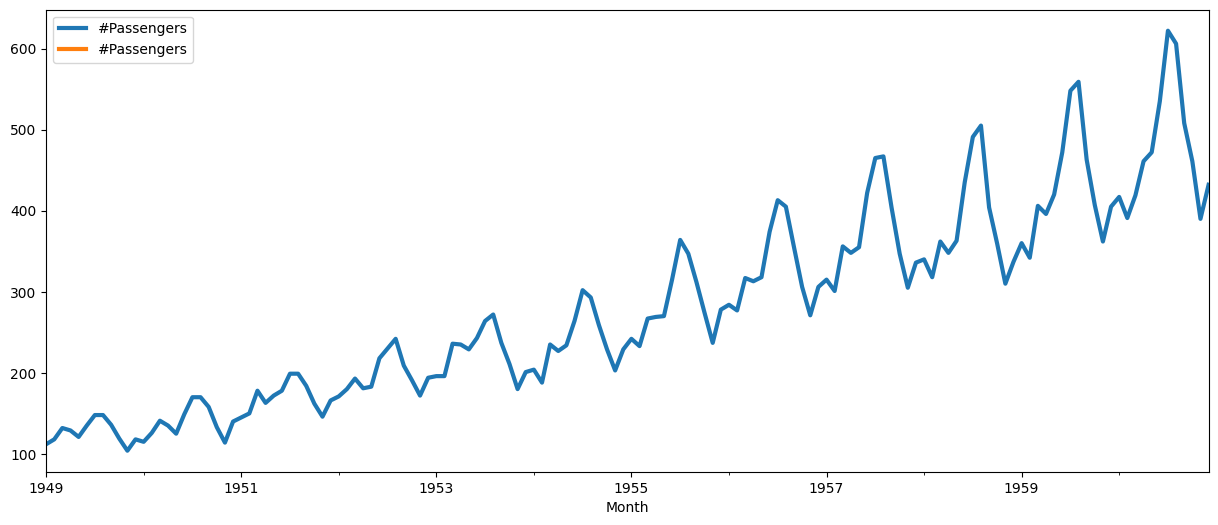

In [27]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)